In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel('DB1b_20230730-20230630.xlsx', sheet_name='Dataset1')
data_summary = data.tail(4)
data = data[:-4]
data['Date'] = data['Date'].astype(int)
data['Date'] = pd.to_datetime(data['Date'].astype(str), format='%Y-%m-%d')
data = data.rename(columns={'Default Channel Grouping': 'Channel', 'Ecommerce Conversion Rate':'Conversion'})
data

,Channel,Date,Date Range,Segment,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Conversion,Transactions,Revenue
0,Direct,2022-09-21,"Jul 1, 2022 - Jun 30, 2023",All Users,4098,3210,4693,0.448753,3.093970,135.248455,0.013850,65,9484.359644
1,Direct,2022-09-21,"Jul 1, 2022 - Jun 30, 2023",Product Click,592,499,616,0.000000,6.251623,267.504870,0.021104,13,5760.616945
2,Direct,2022-09-21,"Jul 1, 2022 - Jun 30, 2023",Add to Cart,273,187,280,0.000000,9.907143,557.746429,0.185714,52,8672.908212
3,Direct,2022-09-21,"Jul 1, 2022 - Jun 30, 2023",Made Purchase,49,23,49,0.000000,14.204082,769.040816,1.000000,49,6739.630695
4,Email,2022-09-14,"Jul 1, 2022 - Jun 30, 2023",All Users,3727,3171,4262,0.753168,2.016893,75.619427,0.031675,135,22784.709562
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Social,2023-06-27,"Jul 1, 2022 - Jun 30, 2023",Made Purchase,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
9236,Social,2023-06-29,"Jul 1, 2022 - Jun 30, 2023",All Users,3,3,3,0.000000,7.666667,403.333333,0.000000,0,0.000000
9237,Social,2023-06-29,"Jul 1, 2022 - Jun 30, 2023",Product Click,3,3,3,0.000000,7.666667,403.333333,0.000000,0,0.000000
9238,Social,2023-06-29,"Jul 1, 2022 - Jun 30, 2023",Add to Cart,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0.000000


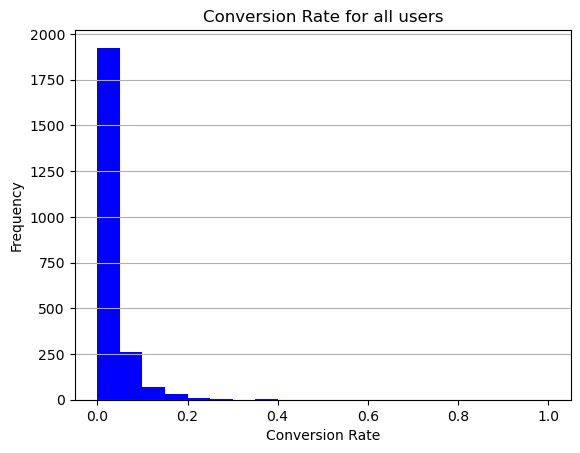

In [3]:
data_all = data[data['Segment']=='All Users']

plt.hist(data_all['Conversion'], bins=20, color='blue')
plt.title('Conversion Rate for all users')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.grid(axis='y')

plt.show()

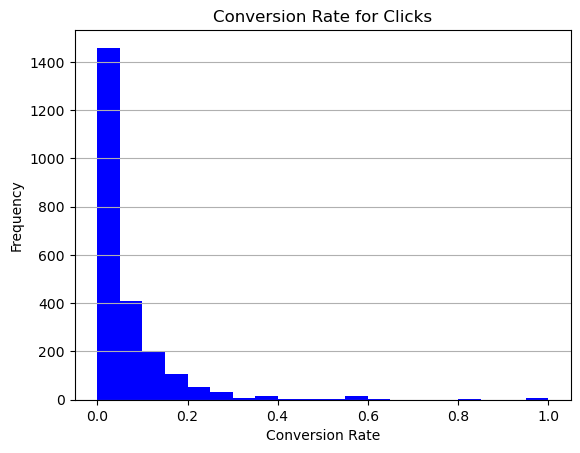

In [4]:
data_click = data[data['Segment']=='Product Click']

plt.hist(data_click['Conversion'], bins=20, color='blue')
plt.title('Conversion Rate for Clicks')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.grid(axis='y')

plt.show()

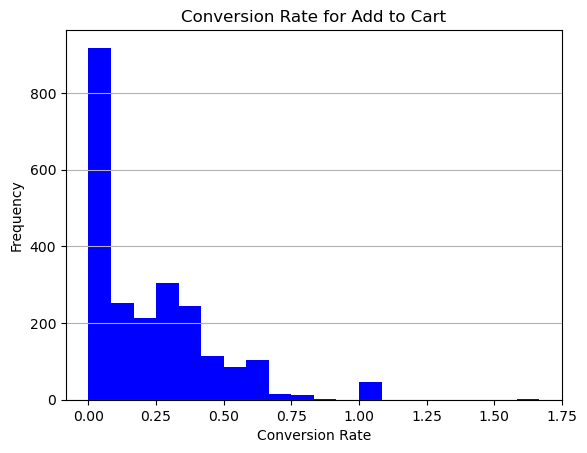

In [5]:
data_cart = data[data['Segment']=='Add to Cart']

plt.hist(data_cart['Conversion'], bins=20, color='blue')
plt.title('Conversion Rate for Add to Cart')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.grid(axis='y')

plt.show()

In [6]:
dummies1 = pd.get_dummies(data['Channel'])

dummies2 = pd.get_dummies(data['Segment'])

dummy1 = pd.concat([data, dummies1], axis=1)
dummy_data = pd.concat([dummy1, dummies2], axis=1)

for column in dummies1.columns:
    dummy_data[column] = dummy_data[column] * dummy_data['Users']
    
for column in dummies2.columns:
    dummy_data[column] = dummy_data[column] * dummy_data['Users']

dummy_data = dummy_data.drop(columns = ['Date Range','Channel','Segment'])
dummy_data

,Date,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Conversion,Transactions,Revenue,...,Direct,Email,Organic Search,Paid Search,Referral,Social,Add to Cart,All Users,Made Purchase,Product Click
0,2022-09-21,4098,3210,4693,0.448753,3.093970,135.248455,0.013850,65,9484.359644,...,4098,0,0,0,0,0,0,4098,0,0
1,2022-09-21,592,499,616,0.000000,6.251623,267.504870,0.021104,13,5760.616945,...,592,0,0,0,0,0,0,0,0,592
2,2022-09-21,273,187,280,0.000000,9.907143,557.746429,0.185714,52,8672.908212,...,273,0,0,0,0,0,273,0,0,0
3,2022-09-21,49,23,49,0.000000,14.204082,769.040816,1.000000,49,6739.630695,...,49,0,0,0,0,0,0,0,49,0
4,2022-09-14,3727,3171,4262,0.753168,2.016893,75.619427,0.031675,135,22784.709562,...,0,3727,0,0,0,0,0,3727,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,2023-06-27,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
9236,2023-06-29,3,3,3,0.000000,7.666667,403.333333,0.000000,0,0.000000,...,0,0,0,0,0,3,0,3,0,0
9237,2023-06-29,3,3,3,0.000000,7.666667,403.333333,0.000000,0,0.000000,...,0,0,0,0,0,3,0,0,0,3
9238,2023-06-29,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [7]:
aggregation = {'Users': 'sum', 'New Users': 'sum', 'Bounce Rate': 'mean', 'Avg. Session Duration': 'mean', 'Pages / Session': 'mean', '(Other)': 'sum', 'Direct': 'sum', 'Email': 'sum', 'Organic Search': 'sum', 'Paid Search': 'sum', 'Referral': 'sum', 'Social': 'sum', 'Add to Cart': 'sum', 'Made Purchase': 'sum', 'Product Click': 'sum'}
df = dummy_data.groupby('Date').agg(aggregation).reset_index()
df

,Date,Users,New Users,Bounce Rate,Avg. Session Duration,Pages / Session,(Other),Direct,Email,Organic Search,Paid Search,Referral,Social,Add to Cart,Made Purchase,Product Click
0,2022-07-01,5241,4128,0.086752,281.724591,7.562434,0,732,2477,1421,509,70,32,283,62,1249
1,2022-07-02,2731,1989,0.083993,345.647845,10.363356,0,466,459,1260,460,57,29,162,11,638
2,2022-07-03,2218,1576,0.098716,409.162697,11.692606,0,517,250,1026,349,55,21,149,32,437
3,2022-07-04,2896,2074,0.080653,508.241570,12.254744,0,449,192,1045,397,792,21,166,38,477
4,2022-07-05,2613,1849,0.095768,377.312189,11.941080,0,602,75,1329,418,171,18,157,24,566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-06-26,5050,3805,0.139837,391.681446,9.097169,11,1309,1311,1530,668,213,8,260,44,928
361,2023-06-27,3374,2420,0.072776,327.005544,8.986369,13,1057,210,1280,636,172,6,185,63,628
362,2023-06-28,2653,1863,0.089451,370.081697,10.542508,75,648,57,1163,590,112,8,151,40,506
363,2023-06-29,2441,1636,0.083338,314.931020,7.116241,24,507,60,1096,621,127,6,134,36,496


<Axes: xlabel='Date'>

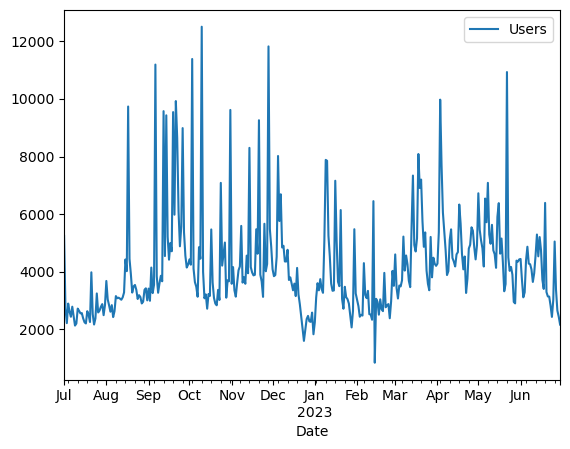

In [8]:
df.plot('Date', 'Users')

In [9]:
df['is_weekend'] = df['Date'].apply(lambda x: 1 if x.dayofweek >= 5 else 0)
df['Month'] = df['Date'].dt.month

In [10]:
top_10_values = df.nsmallest(10, 'Users')
result = top_10_values['Date']
top_10_values

,Date,Users,New Users,Bounce Rate,Avg. Session Duration,Pages / Session,(Other),Direct,Email,Organic Search,Paid Search,Referral,Social,Add to Cart,Made Purchase,Product Click,is_weekend,Month
228,2023-02-14,844,589,0.072617,271.733773,8.218892,0,122,253,348,57,23,41,45,8,171,0,2
176,2022-12-24,1602,1266,0.115705,246.396833,5.797987,0,406,11,829,291,47,18,105,11,301,1,12
183,2022-12-31,1832,1432,0.099424,548.982105,13.124844,0,603,19,857,288,65,0,99,45,330,1,12
177,2022-12-25,1968,1552,0.123148,196.627462,5.971127,3,395,6,1080,440,34,10,123,29,421,1,12
175,2022-12-23,2029,1436,0.096951,343.721275,8.958110,0,439,24,1132,332,86,16,153,45,391,0,12
211,2023-01-28,2069,1607,0.142003,347.554545,9.642353,0,418,3,1174,372,76,26,81,11,411,1,1
8,2022-07-09,2133,1545,0.086288,260.679525,6.133195,3,439,29,1158,358,127,19,122,18,468,1,7
364,2023-06-30,2167,1495,0.084809,414.285307,11.565933,27,548,16,890,545,130,11,99,31,401,0,6
22,2022-07-23,2169,1620,0.089962,266.359314,8.175340,0,478,18,1166,361,125,21,113,8,470,1,7
9,2022-07-10,2204,1628,0.104162,468.636505,9.582185,0,516,31,1152,382,97,26,122,20,432,1,7


In [11]:
df['day_of_week'] = df['Date'].dt.day_name()
dum = pd.get_dummies(df['day_of_week'])

df1 = pd.concat([df, dum], axis=1)
df1

,Date,Users,New Users,Bounce Rate,Avg. Session Duration,Pages / Session,(Other),Direct,Email,Organic Search,...,is_weekend,Month,day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2022-07-01,5241,4128,0.086752,281.724591,7.562434,0,732,2477,1421,...,0,7,Friday,1,0,0,0,0,0,0
1,2022-07-02,2731,1989,0.083993,345.647845,10.363356,0,466,459,1260,...,1,7,Saturday,0,0,1,0,0,0,0
2,2022-07-03,2218,1576,0.098716,409.162697,11.692606,0,517,250,1026,...,1,7,Sunday,0,0,0,1,0,0,0
3,2022-07-04,2896,2074,0.080653,508.241570,12.254744,0,449,192,1045,...,0,7,Monday,0,1,0,0,0,0,0
4,2022-07-05,2613,1849,0.095768,377.312189,11.941080,0,602,75,1329,...,0,7,Tuesday,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-06-26,5050,3805,0.139837,391.681446,9.097169,11,1309,1311,1530,...,0,6,Monday,0,1,0,0,0,0,0
361,2023-06-27,3374,2420,0.072776,327.005544,8.986369,13,1057,210,1280,...,0,6,Tuesday,0,0,0,0,0,1,0
362,2023-06-28,2653,1863,0.089451,370.081697,10.542508,75,648,57,1163,...,0,6,Wednesday,0,0,0,0,0,0,1
363,2023-06-29,2441,1636,0.083338,314.931020,7.116241,24,507,60,1096,...,0,6,Thursday,0,0,0,0,1,0,0


In [12]:
condition_mon = (df1['Monday'] == 1)
condition_weekend = (df1['is_weekend'] == 1)
condition_dec = (df1['Month'] == 12)
condition_jul = (df1['Month'] == 7)
df1['I_Mon'] = condition_mon.astype(int)
df1['I_Weekend'] = condition_weekend.astype(int)
df1['I_Dec'] = condition_dec.astype(int)
df1['I_Jul'] = condition_jul.astype(int)
df1

,Date,Users,New Users,Bounce Rate,Avg. Session Duration,Pages / Session,(Other),Direct,Email,Organic Search,...,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,I_Mon,I_Weekend,I_Dec,I_Jul
0,2022-07-01,5241,4128,0.086752,281.724591,7.562434,0,732,2477,1421,...,0,0,0,0,0,0,0,0,0,1
1,2022-07-02,2731,1989,0.083993,345.647845,10.363356,0,466,459,1260,...,0,1,0,0,0,0,0,1,0,1
2,2022-07-03,2218,1576,0.098716,409.162697,11.692606,0,517,250,1026,...,0,0,1,0,0,0,0,1,0,1
3,2022-07-04,2896,2074,0.080653,508.241570,12.254744,0,449,192,1045,...,1,0,0,0,0,0,1,0,0,1
4,2022-07-05,2613,1849,0.095768,377.312189,11.941080,0,602,75,1329,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-06-26,5050,3805,0.139837,391.681446,9.097169,11,1309,1311,1530,...,1,0,0,0,0,0,1,0,0,0
361,2023-06-27,3374,2420,0.072776,327.005544,8.986369,13,1057,210,1280,...,0,0,0,0,1,0,0,0,0,0
362,2023-06-28,2653,1863,0.089451,370.081697,10.542508,75,648,57,1163,...,0,0,0,0,0,1,0,0,0,0
363,2023-06-29,2441,1636,0.083338,314.931020,7.116241,24,507,60,1096,...,0,0,0,1,0,0,0,0,0,0


In [13]:
X = sm.add_constant(df1[['New Users','Direct','(Other)','Email', 'Organic Search', 'Paid Search', 'Referral', 'Social', 'Pages / Session', 'Avg. Session Duration','I_Mon','I_Weekend', 'I_Dec']])
y = df1['Product Click']

model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Product Click   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     320.0
Date:                Mon, 16 Oct 2023   Prob (F-statistic):          1.31e-185
Time:                        00:23:31   Log-Likelihood:                -2236.5
No. Observations:                 365   AIC:                             4501.
Df Residuals:                     351   BIC:                             4556.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -136.71

In [14]:
df1['p_productclick'] = df1['Product Click'] / df1['Users']

In [15]:
y = df1['p_productclick']

model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         p_productclick   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     19.09
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           1.22e-33
Time:                        00:23:31   Log-Likelihood:                 940.50
No. Observations:                 365   AIC:                            -1853.
Df Residuals:                     351   BIC:                            -1798.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.18

In [16]:
df1['logodds_click'] = np.log(df1['p_productclick'] / (1 - df1['p_productclick']))
df1

,Date,Users,New Users,Bounce Rate,Avg. Session Duration,Pages / Session,(Other),Direct,Email,Organic Search,...,Sunday,Thursday,Tuesday,Wednesday,I_Mon,I_Weekend,I_Dec,I_Jul,p_productclick,logodds_click
0,2022-07-01,5241,4128,0.086752,281.724591,7.562434,0,732,2477,1421,...,0,0,0,0,0,0,0,1,0.238313,-1.161949
1,2022-07-02,2731,1989,0.083993,345.647845,10.363356,0,466,459,1260,...,0,0,0,0,0,1,0,1,0.233614,-1.188015
2,2022-07-03,2218,1576,0.098716,409.162697,11.692606,0,517,250,1026,...,1,0,0,0,0,1,0,1,0.197024,-1.404997
3,2022-07-04,2896,2074,0.080653,508.241570,12.254744,0,449,192,1045,...,0,0,0,0,1,0,0,1,0.164710,-1.623593
4,2022-07-05,2613,1849,0.095768,377.312189,11.941080,0,602,75,1329,...,0,0,1,0,0,0,0,1,0.216609,-1.285537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-06-26,5050,3805,0.139837,391.681446,9.097169,11,1309,1311,1530,...,0,0,0,0,1,0,0,0,0.183762,-1.491062
361,2023-06-27,3374,2420,0.072776,327.005544,8.986369,13,1057,210,1280,...,0,0,1,0,0,0,0,0,0.186129,-1.475360
362,2023-06-28,2653,1863,0.089451,370.081697,10.542508,75,648,57,1163,...,0,0,0,1,0,0,0,0,0.190727,-1.445290
363,2023-06-29,2441,1636,0.083338,314.931020,7.116241,24,507,60,1096,...,0,1,0,0,0,0,0,0,0.203195,-1.366441


In [17]:
y = df1['logodds_click']

model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          logodds_click   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     19.90
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           6.50e-35
Time:                        00:23:32   Log-Likelihood:                 260.57
No. Observations:                 365   AIC:                            -493.1
Df Residuals:                     351   BIC:                            -438.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.49

In [18]:
condition_prob = df1['p_productclick'] > 0.2
df1['p_click_binary'] = condition_prob.astype(int)

In [19]:
y = df1['p_click_binary']
model = sm.GLM(y, X, family = sm.families.Binomial()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         p_click_binary   No. Observations:                  365
Model:                            GLM   Df Residuals:                      351
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -168.26
Date:                Mon, 16 Oct 2023   Deviance:                       336.52
Time:                        00:23:32   Pearson chi2:                     402.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2706
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.5078      0.909     -2.758      0.006      -4.290      -0.725
New Users                 0.0027      0.001      2.432      0.015       0.001       0.005
Direct                   -0.0043      0.001     -4.718      0.000      -0.006      -0.003
(Other)                  -0.0006      0.004     -0.127      0.899      -0.009       0.008
Email                    -0.0021      0.001     -2.312      0.021      -0.004      -0.000
Organic Search           -0.0012      0.001     -1.265      0.206      -0.003       0.001
Paid Search               0.0025      0.001      2.845      0.004       0.001       0.004
Referral                 -0.0053      0.001     -4.250      0.000      -0.008      -0.003
Social                    0.0014      0.003      0.457      0.648      -0.005       0.007
Pages / Session           0.2340      0.148      1.579      0.114      -0.056       0.524
Avg. Session Duration     0.0006      0.003      0.226      0.821      -0.005       0.006
I_Mon                    -0.0048      0.434     -0.011      0.991      -0.856       0.847
I_Weekend                -0.1256      0.350     -0.359      0.720      -0.811       0.560
I_Dec                    -1.5904      0.467     -3.407      0.001      -2.505      -0.676
=========================================================================================
"""

---

In [20]:
df1['p_cartuse'] = df1['Add to Cart']/df1['Users']
df1['logodds_cartuse'] = np.log(df1['p_cartuse'] / (1 - df1['p_cartuse']))

In [21]:
y = df1['logodds_cartuse']

model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        logodds_cartuse   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     29.71
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           6.89e-49
Time:                        00:23:32   Log-Likelihood:                 141.60
No. Observations:                 365   AIC:                            -255.2
Df Residuals:                     351   BIC:                            -200.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.99

In [22]:
df1['cartuse_cond_click'] = df1['p_cartuse'] / df1['p_productclick']
y = df1['cartuse_cond_click']

model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     cartuse_cond_click   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     33.47
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           1.19e-53
Time:                        00:23:32   Log-Likelihood:                 522.41
No. Observations:                 365   AIC:                            -1017.
Df Residuals:                     351   BIC:                            -962.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

---

In [23]:
df1['p_purchase'] = df1['Made Purchase']/df1['Users']
df1['logodds_purchase'] = np.log(df1['p_purchase'] / (1 - df1['p_purchase']))

In [24]:
y = df1['logodds_purchase']

model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       logodds_purchase   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     27.39
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           8.28e-46
Time:                        00:23:32   Log-Likelihood:                -114.56
No. Observations:                 365   AIC:                             257.1
Df Residuals:                     351   BIC:                             311.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -4.86

In [25]:
df1['purchase_cond_cartuse'] = df1['p_purchase'] / df1['p_cartuse']
y = df1['purchase_cond_cartuse']

model = sm.OLS(y,X).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     purchase_cond_cartuse   R-squared:                       0.325
Model:                               OLS   Adj. R-squared:                  0.300
Method:                    Least Squares   F-statistic:                     13.02
Date:                   Mon, 16 Oct 2023   Prob (F-statistic):           1.90e-23
Time:                           00:23:32   Log-Likelihood:                 529.06
No. Observations:                    365   AIC:                            -1030.
Df Residuals:                        351   BIC:                            -975.5
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [26]:
df1['logodds_cartcondclick'] = np.log(df1['cartuse_cond_click'] / (1 - df1['cartuse_cond_click']))
df1['logodds_purcondcart'] = np.log(df1['purchase_cond_cartuse'] / (1 - df1['purchase_cond_cartuse']))

In [27]:
y = df1['logodds_cartcondclick']

model = sm.OLS(y,X).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     logodds_cartcondclick   R-squared:                       0.545
Model:                               OLS   Adj. R-squared:                  0.528
Method:                    Least Squares   F-statistic:                     32.38
Date:                   Mon, 16 Oct 2023   Prob (F-statistic):           2.67e-52
Time:                           00:23:32   Log-Likelihood:                -27.146
No. Observations:                    365   AIC:                             82.29
Df Residuals:                        351   BIC:                             136.9
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [28]:
y = df1['logodds_purcondcart']

model = sm.OLS(y,X).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     logodds_purcondcart   R-squared:                       0.315
Model:                             OLS   Adj. R-squared:                  0.290
Method:                  Least Squares   F-statistic:                     12.44
Date:                 Mon, 16 Oct 2023   Prob (F-statistic):           2.10e-22
Time:                         00:23:32   Log-Likelihood:                -122.75
No. Observations:                  365   AIC:                             273.5
Df Residuals:                      351   BIC:                             328.1
Df Model:                           13                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               